In [1]:
using Revise

ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
using FileIO
using JLD2
using RiskSensitiveSAC

┌ Info: Precompiling RiskSensitiveSAC [e1fab9f6-18d5-46a3-a575-fcee50e8520a]
└ @ Base loading.jl:1278
┌ Info: Number of Julia Thread(s): 1
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:39
┌ Info: CUDA Device: GeForce GTX 1050 Ti with Max-Q Design
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:40
┌ Info: Python executable used by PyCall: /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/env_trajectron++/bin/python3.6
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/RiskSensitiveSAC.jl:41


In [2]:
include("$(@__DIR__)/../scripts/default_params/params_data_gaussian.jl");

dtr = 0.4;                                                                          # replanning time interval [s]
tcalc = 0.2;                                                                        # pre-allocated control computation time [s] (< dtr)
target_speed = 1.0;                                                                 # target speed [m/s]

model_dir = normpath(joinpath(@__DIR__, "../CrowdNav/crowd_nav/data/output_om_sarl_radius_0.4")) # directory of the trained policy
env_config = "env.config"                                                           # environment config file name
policy_config = "policy.config"                                                     # policy config file name
policy_name = "sarl"                                                                # policy name


include("$(@__DIR__)/../scripts/parameter_setup_crowd_nav.jl");

In [3]:
scene_loader, controller, w_init, ado_inputs, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param, cnt_param,
                 cost_param=cost_param,
                 dtc=dtc,
                 prediction_steps=prediction_steps,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=true);

Scene Mode: data
CrowdNav Controller
Loaded evaluation data from /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/Trajectron-plus-plus/experiments/processed/eth_test.pkl
Looking at the eth_test.pkl sequence, data_id 0, start_idx 905


In [4]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec, target_speed,
                  measurement_schedule, target_trajectory, pos_error_replan, 
                  ado_inputs_init=ado_inputs);

┌ Warning: Time 0.00 [sec]: BIC computation took 0.372 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/crowd_nav_controller.jl:84
┌ Warning: Time 0.00 [sec]: This evaluation iteration took 0.237 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:289
┌ Warning: Time 0.40 [sec]: This evaluation iteration took 0.023 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/evaluation.jl:289


In [5]:
display_log(result.log)

Time 0.00 [sec]: New CrowdNav control computation is scheduled.
Time 0.00 [sec]: New CrowdNav control is available to the controller.
Time 0.00 [sec]: Control: [0.9567085809127246, -0.19030116872178315] is applied to the system.
Time 0.02 [sec]: Control: [0.9567085809127246, -0.19030116872178315] is applied to the system.
Time 0.04 [sec]: Control: [0.9567085809127246, -0.19030116872178315] is applied to the system.
Time 0.06 [sec]: Control: [0.9567085809127246, -0.19030116872178315] is applied to the system.
Time 0.08 [sec]: Control: [0.9567085809127246, -0.19030116872178315] is applied to the system.
Time 0.10 [sec]: Control: [0.9567085809127246, -0.19030116872178315] is applied to the system.
Time 0.12 [sec]: Control: [0.9567085809127246, -0.19030116872178315] is applied to the system.
Time 0.14 [sec]: Control: [0.9567085809127246, -0.19030116872178315] is applied to the system.
Time 0.16 [sec]: Control: [0.9567085809127246, -0.19030116872178315] is applied to the system.
Time 0.18 [

Time 1.92 [sec]: Control: [0.002272182879668183, -0.000451965275715116] is applied to the system.
Time 1.94 [sec]: Control: [0.002272182879668183, -0.000451965275715116] is applied to the system.
Time 1.96 [sec]: Control: [0.002272182879668183, -0.000451965275715116] is applied to the system.
Time 1.98 [sec]: Control: [0.002272182879668183, -0.000451965275715116] is applied to the system.
Time 2.00 [sec]: New measurement is obtained.
Time 2.00 [sec]: New CrowdNav control computation is scheduled.
Time 2.00 [sec]: Control: [0.002272182879668183, -0.000451965275715116] is applied to the system.
Time 2.02 [sec]: New CrowdNav control is available to the controller.
Time 2.02 [sec]: Control: [0.00023319771659827127, -4.638590987482427e-5] is applied to the system.
Time 2.04 [sec]: Control: [0.00023319771659827127, -4.638590987482427e-5] is applied to the system.
Time 2.06 [sec]: Control: [0.00023319771659827127, -4.638590987482427e-5] is applied to the system.
Time 2.08 [sec]: Control: [0.0

Time 3.82 [sec]: Control: [-0.9567075300655135, 0.19030095969527427] is applied to the system.
Time 3.84 [sec]: Control: [-0.9567075300655135, 0.19030095969527427] is applied to the system.
Time 3.86 [sec]: Control: [-0.9567075300655135, 0.19030095969527427] is applied to the system.
Time 3.88 [sec]: Control: [-0.9567075300655135, 0.19030095969527427] is applied to the system.
Time 3.90 [sec]: Control: [-0.9567075300655135, 0.19030095969527427] is applied to the system.
Time 3.92 [sec]: Control: [-0.9567075300655135, 0.19030095969527427] is applied to the system.
Time 3.94 [sec]: Control: [-0.9567075300655135, 0.19030095969527427] is applied to the system.
Time 3.96 [sec]: Control: [-0.9567075300655135, 0.19030095969527427] is applied to the system.
Time 3.98 [sec]: Control: [-0.9567075300655135, 0.19030095969527427] is applied to the system.
Time 4.00 [sec]: New measurement is obtained.
Time 4.00 [sec]: New CrowdNav control computation is scheduled.
Time 4.00 [sec]: Control: [-0.95670

Time 5.80 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 5.82 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 5.84 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 5.86 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 5.88 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 5.90 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 5.92 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 5.94 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 5.96 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 5.98 [sec]: Control: [1.080895282720771, -0.46466381848923516] is applied to the system.
Time 6.00 [sec]: New measurement is obtained.
Time 6.00 [sec

Time 7.80 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 7.82 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 7.84 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 7.86 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 7.88 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 7.90 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 7.92 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 7.94 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 7.96 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 7.98 [sec]: Control: [0.8797667925368763, 0.3882044727797526] is applied to the system.
Time 8.00 [sec]: New measurement is obtained.
Time 8.00 [sec]: New Cro

Time 9.78 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.80 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.82 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.84 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.86 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.88 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.90 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.92 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.94 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.96 [sec]: Control: [1.7410408297376336, -1.7947005254396946] is applied to the system.
Time 9.98 [sec]: Control: [1.7410408297376336, -1.7947005254

In [6]:
result.total_cnt_cost

2.163238324777871

In [7]:
result.total_pos_cost

2.820145180001361

In [8]:
result.total_col_cost

77.15290400814331

In [9]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

82.13628751292254

In [10]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

0.35858583627887064

┌ Warning: No prediction is available with BIC or CrowdNav Controller
└ @ RiskSensitiveSAC /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/src/utils.jl:664
Progress: 100%|█████████████████████████████████████████| Time: 0:00:26
┌ Info: Saved animation to 
│   fn = /home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/8_crowd_nav_data.gif
└ @ Plots /home/haruki/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/haruki/Documents/2020-21_Autumn/RiskSensitiveSAC.jl/notebook/8_crowd_nav_data.gif")
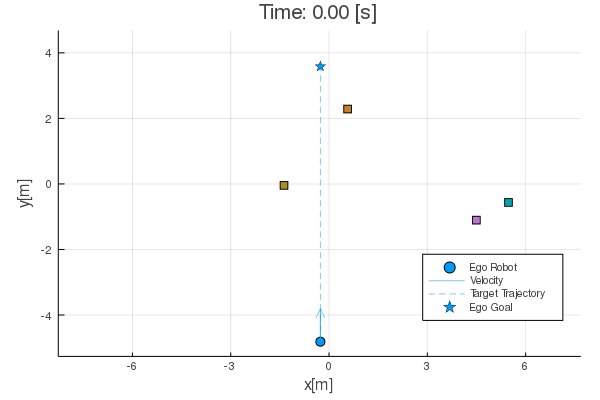

In [11]:
make_gif(result, dtplot=0.02, fps=50, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="8_crowd_nav_data.gif")

In [12]:
save("8_crowd_nav_data.jld2", "result", result)